# Google Cloud Bucket의 데이터 다운받기

In [50]:
# 공유받은 버킷 안 압축파일 확인하기
!gsutil ls -r gs://highway-ggyolo/

gs://highway-ggyolo/train_image.zip
gs://highway-ggyolo/train_image_1234.z01
gs://highway-ggyolo/train_image_1234.z02
gs://highway-ggyolo/train_image_1234.z03
gs://highway-ggyolo/train_image_1234.z04
gs://highway-ggyolo/train_image_1234.z05
gs://highway-ggyolo/train_image_1234.z06
gs://highway-ggyolo/train_image_1234.z07
gs://highway-ggyolo/train_image_1234.zip
gs://highway-ggyolo/train_labels_1234.zip
gs://highway-ggyolo/val_image_1234.zip
gs://highway-ggyolo/val_labels_1234.zip


In [12]:
# 버킷 안 압축파일을 로컬에 다운로드하기
!gsutil -m cp gs://highway-ggyolo/train_image_1234.zip train_image_1234.zip

Copying gs://highway-ggyolo/train_image_1234.zip...
- [1/1 files][  1.8 GiB/  1.8 GiB] 100% Done  41.0 MiB/s ETA 00:00:00           
Operation completed over 1 objects/1.8 GiB.                                      


In [13]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z01 train_image_1234.z01

Copying gs://highway-ggyolo/train_image_1234.z01...
- [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  27.1 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [14]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z02 train_image_1234.z02

Copying gs://highway-ggyolo/train_image_1234.z02...
- [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  31.8 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [15]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z03 train_image_1234.z03

Copying gs://highway-ggyolo/train_image_1234.z03...
/ [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  33.7 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [16]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z04 train_image_1234.z04

Copying gs://highway-ggyolo/train_image_1234.z04...
- [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  35.5 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [17]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z05 train_image_1234.z05

Copying gs://highway-ggyolo/train_image_1234.z05...
| [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  29.4 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [18]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z06 train_image_1234.z06

Copying gs://highway-ggyolo/train_image_1234.z06...
/ [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  30.9 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [19]:
!gsutil -m cp gs://highway-ggyolo/train_image_1234.z07 train_image_1234.z07

Copying gs://highway-ggyolo/train_image_1234.z07...
/ [1/1 files][  4.0 GiB/  4.0 GiB] 100% Done  40.0 MiB/s ETA 00:00:00           
Operation completed over 1 objects/4.0 GiB.                                      


In [20]:
!gsutil -m cp gs://highway-ggyolo/train_labels_1234.zip train_labels_1234.zip

Copying gs://highway-ggyolo/train_labels_1234.zip...
| [1/1 files][  6.0 MiB/  6.0 MiB] 100% Done                                    
Operation completed over 1 objects/6.0 MiB.                                      


In [21]:
!gsutil -m cp gs://highway-ggyolo/val_image_1234.zip val_image_1234.zip

Copying gs://highway-ggyolo/val_image_1234.zip...
- [1/1 files][  3.9 GiB/  3.9 GiB] 100% Done  42.4 MiB/s ETA 00:00:00           
Operation completed over 1 objects/3.9 GiB.                                      


In [22]:
!gsutil -m cp gs://highway-ggyolo/val_labels_1234.zip val_labels_1234.zip

Copying gs://highway-ggyolo/val_labels_1234.zip...
- [1/1 files][785.3 KiB/785.3 KiB] 100% Done                                    
Operation completed over 1 objects/785.3 KiB.                                    


In [ ]:
# 분할된 zip 파일을 하나의 zip 파일로 합치기
# 무려 30분이나 걸림..다른 방법 있나요??
!zip -s 0 train_image_1234.zip --out train_image.zip

# 데이터 압축 풀 파일 생성하고 압축풀기

In [24]:
# HOME 디렉토리 설정하기
HOME = '/home/jupyter'

In [25]:
# train, validation 데이터셋 폴더 생성하기 (images / xmls(xml)/ labels(txt))
%cd {HOME}
!mkdir highway
!mkdir highway/train
!mkdir highway/train/images
!mkdir highway/train/xmls
!mkdir highway/train/labels
!mkdir highway/val
!mkdir highway/val/images
!mkdir highway/val/xmls
!mkdir highway/val/labels

/home/jupyter


In [30]:
%%time
import zipfile
import multiprocessing
import concurrent.futures

# train images 압축파일 풀기

def unzip(file):
    with lock:
        zf.extract(file, path='/home/jupyter/highway/train/images')

zipfilePath = '/home/jupyter/train_image.zip'  
zf = zipfile.ZipFile(zipfilePath)    

m = multiprocessing.Manager()
lock = m.Lock()

with concurrent.futures.ProcessPoolExecutor(max_workers=16) as executor:
    executor.map(unzip, zf.infolist())
    
# 압축 unzip() 안쓰고 빠르게 풀기 (데이터 손실은 약간 있을 수 있음)
# %%time을 맨 윗 줄에 안놓으면 생기는 오류 UsageError: Line magic function `%%time` not found.

CPU times: user 7.91 s, sys: 1.63 s, total: 9.54 s
Wall time: 4min 55s


In [26]:
# train images 압축파일 위치 바꾸기 (필요 X)
# !mv ./train_image.zip ./highway/train/images/train_image.zip

In [ ]:
# train images 압축파일 풀기 (무식한 방법)
# 약 1시간 30분 걸림
# %cd {HOME}
# %cd ./highway/train/images
# !unzip train_image.zip

In [32]:
%%time
import zipfile
import multiprocessing
import concurrent.futures

# train labels 압축파일 풀기

def unzip(file):
    with lock:
        zf.extract(file, path='/home/jupyter/highway/train/xmls')

zipfilePath = '/home/jupyter/train_labels_1234.zip'  
zf = zipfile.ZipFile(zipfilePath)    

m = multiprocessing.Manager()
lock = m.Lock()

with concurrent.futures.ProcessPoolExecutor(max_workers=16) as executor:
    executor.map(unzip, zf.infolist())
    
# 압축 unzip() 안쓰고 빠르게 풀기 (데이터 손실은 약간 있을 수 있음)
# %%time을 맨 윗 줄에 안놓으면 생기는 오류 UsageError: Line magic function `%%time` not found.

CPU times: user 74.1 ms, sys: 92.8 ms, total: 167 ms
Wall time: 508 ms


In [41]:
# train labels 압축파일 위치 변경하기 (필요 X)
# !mv ./train_labels_1234.zip ./highway/train/xmls/train_labels_1234.zip

In [ ]:
# train labels 압축파일 풀기 (무식한 방법)
# %cd ./highway/train/xmls
# !unzip train_labels_1234.zip

In [33]:
%%time
import zipfile
import multiprocessing
import concurrent.futures

# val images 압축파일 풀기

def unzip(file):
    with lock:
        zf.extract(file, path='/home/jupyter/highway/val/images')

zipfilePath = '/home/jupyter/val_image_1234.zip'  
zf = zipfile.ZipFile(zipfilePath)    

m = multiprocessing.Manager()
lock = m.Lock()

with concurrent.futures.ProcessPoolExecutor(max_workers=16) as executor:
    executor.map(unzip, zf.infolist())
    
# 압축 unzip() 안쓰고 빠르게 풀기 (데이터 손실은 약간 있을 수 있음)
# %%time을 맨 윗 줄에 안놓으면 생기는 오류 UsageError: Line magic function `%%time` not found.

CPU times: user 1 s, sys: 283 ms, total: 1.29 s
Wall time: 36.6 s


In [43]:
# valid images 압축파일 위치 변경하기 (필요 X)
# !mv ./val_image_1234.zip ./highway/val/images/val_image_1234.zip

In [ ]:
# valid images 압축파일 풀기 (무식한 방법)
# %cd {HOME}
# %cd ./highway/val/images
# !unzip val_image_1234.zip

In [34]:
%%time
import zipfile
import multiprocessing
import concurrent.futures

# val labels 압축파일 풀기

def unzip(file):
    with lock:
        zf.extract(file, path='/home/jupyter/highway/val/xmls')

zipfilePath = '/home/jupyter/val_labels_1234.zip'  
zf = zipfile.ZipFile(zipfilePath)    

m = multiprocessing.Manager()
lock = m.Lock()

with concurrent.futures.ProcessPoolExecutor(max_workers=16) as executor:
    executor.map(unzip, zf.infolist())
    
# 압축 unzip() 안쓰고 빠르게 풀기 (데이터 손실은 약간 있을 수 있음)
# %%time을 맨 윗 줄에 안놓으면 생기는 오류 UsageError: Line magic function `%%time` not found.

CPU times: user 26.1 ms, sys: 93.7 ms, total: 120 ms
Wall time: 395 ms


In [44]:
# valid labels 압축파일 위치 변경하기 (필요 X)
# !mv ./val_labels_1234.zip ./highway/val/xmls/val_labels_1234.zip

In [57]:
# valid labels 압축파일 풀기 (무식한 방법)
# %cd {HOME}
# %cd ./highway/val/xmls
# !unzip val_labels_1234.zip

/home/jupyter
/home/jupyter/highway/valid/xmls
Archive:  val_labels_1234.zip
   creating: [라벨]1.수도권영동선/
  inflating: [라벨]1.수도권영동선/Suwon_CH01_20200720_1830_MON_9m_RH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH01_20200721_1700_TUE_9m_RH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH01_20200722_1430_WED_9m_NH_highway_TW5_rainy_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH01_20200722_1930_WED_9m_NH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH01_20201012_1723_MON_9m_RH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH01_20201213_1200_SUN_9m_NH_highway_TW5_snow_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH02_20200720_2130_MON_9m_NH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH02_20200721_2030_TUE_9m_NH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH02_20200722_1730_WED_9m_NH_highway_TW5_sunny_FHD.xml  
  inflating: [라벨]1.수도권영동선/Suwon_CH02_20201011_1806_SUN_9m_RH_highway_TW5_sunny_FHD.xml  
  infla

# 데이터 전처리하기

In [48]:
# train의 xml 파일 목록을 리스트로 불러오기 
import glob
import os

%cd {HOME}
%cd ./highway/train/xmls
xml_file_list = glob.glob('./**', recursive=True)
xml_file_name = [os.path.basename(x) for x  in xml_file_list]

xml_file_name

/home/jupyter
/home/jupyter/highway/train/xmls


['',
 'Suwon_CH04_20200720_2000_MON_9m_NH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH02_20201010_1908_SAT_9m_NH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH01_20200720_1800_MON_9m_NH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH03_20200722_1530_WED_9m_NH_highway_OW5_rainy_FHD.xml',
 'Suwon_CH02_20200722_1830_WED_9m_RH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH01_20200720_1900_MON_9m_RH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH04_20200720_1730_MON_9m_NH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH04_20201011_1919_SUN_9m_RH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH03_20201213_0835_SUN_9m_NH_highway_OW5_snow_FHD.xml',
 'Suwon_CH03_20200722_1600_WED_9m_NH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH02_20201011_1836_SUN_9m_RH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH01_20200722_1600_WED_9m_RH_highway_TW5_rainy_FHD.xml',
 'Suwon_CH04_20201213_0838_SUN_9m_NH_highway_OW5_snow_FHD.xml',
 'Suwon_CH04_20201012_1908_MON_9m_RH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH04_20201010_1748_SAT_9m_RH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH03_20200721_

In [49]:
# xml 파일 목록 중 확장자가 xml만 남기기
xml_file_list = []
for filename in xml_file_name:
    if os.path.splitext(filename)[1] == '.xml':
        xml_file_list.append(filename)

xml_file_list

['Suwon_CH04_20200720_2000_MON_9m_NH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH02_20201010_1908_SAT_9m_NH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH01_20200720_1800_MON_9m_NH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH03_20200722_1530_WED_9m_NH_highway_OW5_rainy_FHD.xml',
 'Suwon_CH02_20200722_1830_WED_9m_RH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH01_20200720_1900_MON_9m_RH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH04_20200720_1730_MON_9m_NH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH04_20201011_1919_SUN_9m_RH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH03_20201213_0835_SUN_9m_NH_highway_OW5_snow_FHD.xml',
 'Suwon_CH03_20200722_1600_WED_9m_NH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH02_20201011_1836_SUN_9m_RH_highway_TW5_sunny_FHD.xml',
 'Suwon_CH01_20200722_1600_WED_9m_RH_highway_TW5_rainy_FHD.xml',
 'Suwon_CH04_20201213_0838_SUN_9m_NH_highway_OW5_snow_FHD.xml',
 'Suwon_CH04_20201012_1908_MON_9m_RH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH04_20201010_1748_SAT_9m_RH_highway_OW5_sunny_FHD.xml',
 'Suwon_CH03_20200721_1800_

In [40]:
# valid의 xml 파일 목록을 리스트로 불러오기 
import glob

%cd {HOME}
%cd ./highway/val/xmls/[╢≤║º]1.╝÷╡╡▒╟┐╡╡┐╝▒
xml_file_list2 = glob.glob('./**', recursive=True)
xml_file_name2 = [os.path.basename(x) for x  in xml_file_list2]

len(xml_file_name2)

/home/jupyter
/home/jupyter/highway/val/xmls/[╢≤║º]1.╝÷╡╡▒╟┐╡╡┐╝▒


22

In [41]:
# xml 파일 목록 중 확장자가 xml만 남기기
xml_file_list2 = []
for filename in xml_file_name2:
    if os.path.splitext(filename)[1] == '.xml':
        xml_file_list2.append(filename)

len(xml_file_list2)

21

In [109]:
# xml 파일 수 확인하기
len(xml_file_list2)

21

In [42]:
# !pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.2 MB/s eta 0:00:0000:0100:01


In [43]:
# xml을 txt 파일 형태로 변환할 함수 생성하기
import numpy as np
import lxml
import os

from lxml import etree

CLASSES = ["car", "bus", "truck"]

def to_yolov8(y):
  """
  # change to yolo v8 format
  # [x_top_left, y_top_left, x_bottom_right, y_bottom_right] to
  # [x_center, y_center, width, height]
  """
  width = y[2] - y[0]
  height = y[3] - y[1]

  if width < 0 or height < 0:
      print("ERROR: negative width or height ", width, height, y)
      raise AssertionError("Negative width or height")
  return (y[0] + (width/2)), (y[1] + (height/2)), width, height


def load_xml_annotations(f):
    tree = etree.parse(f)
    anns = []
    for dim in tree.xpath("image"):
        image_filename = dim.attrib["name"]
        width = int(dim.attrib["width"])
        height = int(dim.attrib["height"])

        boxes = []
        for box in dim.xpath("box"):
            label = CLASSES.index(box.attrib["label"])
            xtl, ytl = box.attrib["xtl"], box.attrib["ytl"]
            xbr, ybr = box.attrib["xbr"], box.attrib["ybr"]

            if 'occluded' in box.attrib:
                del box.attrib['occluded']
            if 'order' in box.attrib:
                del box.attrib['order']

            xc, yc, w, h = to_yolov8([float(xtl), float(ytl), float(xbr), float(ybr)])
            boxes.append([label, round(xc/width, 5), round(yc/height, 5), round(w/width, 5), round(h/height, 5)])

        anns.append([image_filename, width, height, boxes])


        if boxes:
            anns.append([image_filename, width, height, boxes])

    return anns

def write_yolov8_txt(folder, annotation):
  #print(annotation[0][:-3])
  out_filename = os.path.join(folder,str(annotation[0][:-3]))
  out_filename = os.path.splitext(out_filename)[0]
  out_filename = out_filename+'.txt'

  f = open(out_filename,"w+")
  for box in annotation[3]:
    f.write("{} {} {} {} {}\n".format(box[0], box[1], box[2], box[3], box[4]))

In [55]:
# 이미지 파일(png)와 txt 파일의 이름 중복 여부를 신경쓰지 않고 모든 txt 파일을 저장할 임의의 폴더 생성하기
%cd {HOME}
!mkdir highway/train/labels0
!mkdir highway/val/labels0

/home/jupyter


In [56]:
# 반복문으로 xml 파일을 txt 파일로 변환하기
xmlPath = '/home/jupyter/highway/train/xmls'
txtPath = '/home/jupyter/highway/train/labels0'

for xmlFile in xml_file_list:
    labelFile = os.path.join(xmlPath, xmlFile) # 해당 파일이 있는 디렉토리 지정
    # print(labelFile)
    anns = load_xml_annotations(labelFile) # xml 파일에서 필요한 내용만 리스트로 정리
    # print(anns) 
    folderName = os.path.splitext(xmlFile)[0] # label 파일 안에 파일명 지정하기
    os.makedirs(os.path.join(txtPath, folderName), exist_ok=True) # label 파일 안에 파일 생성하기
    for ann in anns:
        write_yolov8_txt(os.path.join(txtPath, folderName), ann) # 이미지 파일별로 txt 파일 저장하기

In [60]:
# 반복문으로 xml 파일을 txt 파일로 변환하기
xmlPath = '/home/jupyter/highway/val/xmls/[╢≤║º]1.╝÷╡╡▒╟┐╡╡┐╝▒'
txtPath = '/home/jupyter/highway/val/labels0'

for xmlFile in xml_file_list2:
    labelFile = os.path.join(xmlPath, xmlFile) # 해당 파일이 있는 디렉토리 지정
    # print(labelFile)
    anns = load_xml_annotations(labelFile) # xml 파일에서 필요한 내용만 리스트로 정리
    # print(anns)
    folderName = os.path.splitext(xmlFile)[0] # label 파일 안에 파일명 지정하기
    os.makedirs(os.path.join(txtPath, folderName), exist_ok=True) # label 파일 안에 파일 생성하기
    for ann in anns:
        write_yolov8_txt(os.path.join(txtPath, folderName), ann) # 이미지 파일별로 txt 파일 저장하기

# 고속도로 차량 탐지 YOLO 모델을 생성하기 위한 밑작업
- git clone으로 ultralytics 불러오기
- yaml 파일 생성하기
- YOLO 모델을 돌리기 위해서 train, val 폴더 정리하기 (매우 중요!!!)

In [61]:
# 현재 CPU 확인?
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} \
    ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.1+cu117     (NVIDIA A100-SXM4-40GB)


In [59]:
# YOLO 모델 TOOL 불러오기
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 18935, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 18935 (delta 69), reused 99 (delta 62), pack-reused 18816
Receiving objects: 100% (18935/18935), 10.24 MiB | 17.31 MiB/s, done.
Resolving deltas: 100% (13256/13256), done.
/home/jupyter/ultralytics


In [60]:
!pwd

/home/jupyter/ultralytics


In [61]:
!ls -al

total 184
drwxr-xr-x  9 jupyter jupyter  4096 Nov 21 05:13 .
drwxr-xr-x 16 jupyter jupyter 20480 Nov 21 05:13 ..
drwxr-xr-x  8 jupyter jupyter  4096 Nov 21 05:13 .git
drwxr-xr-x  4 jupyter jupyter  4096 Nov 21 05:13 .github
-rw-r--r--  1 jupyter jupyter  2295 Nov 21 05:13 .gitignore
-rw-r--r--  1 jupyter jupyter  2316 Nov 21 05:13 .pre-commit-config.yaml
-rw-r--r--  1 jupyter jupyter   612 Nov 21 05:13 CITATION.cff
-rw-r--r--  1 jupyter jupyter  5597 Nov 21 05:13 CONTRIBUTING.md
-rw-r--r--  1 jupyter jupyter 34523 Nov 21 05:13 LICENSE
-rw-r--r--  1 jupyter jupyter   200 Nov 21 05:13 MANIFEST.in
-rw-r--r--  1 jupyter jupyter 28854 Nov 21 05:13 README.md
-rw-r--r--  1 jupyter jupyter 27878 Nov 21 05:13 README.zh-CN.md
drwxr-xr-x  2 jupyter jupyter  4096 Nov 21 05:13 docker
drwxr-xr-x 14 jupyter jupyter  4096 Nov 21 05:13 docs
drwxr-xr-x  9 jupyter jupyter  4096 Nov 21 05:13 examples
-rw-r--r--  1 jupyter jupyter  1253 Nov 21 05:13 requirements.txt
-rw-r--r--  1 jupyter jupyter  2016 Nov 

In [62]:
# yaml에 직접 쓰기를 실행하는 함수 생성하기
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [63]:
# yaml 파일 만들 디렉토리 지정하기
dataPath = '/home/jupyter/highway'

dataYaml = os.path.join(dataPath, 'data.yaml')
dataYaml

'/home/jupyter/highway/data.yaml'

In [64]:
# test 데이터 넣을 디렉토리 생성하기 (만약 test 데이터를 추가하면 사용예정)
%cd {HOME}
%cd highway
!mkdir test
!mkdir test/images
!mkdir test/labels

/home/jupyter
/home/jupyter/highway


In [65]:
# 데이터 불러오는 경로 지정하기
import os
from glob import glob

trainPath = os.path.join(dataPath,'train')
validPath = os.path.join(dataPath,'val')
testPath  = os.path.join(dataPath,'test')

trainImagesPath = os.path.join(trainPath, 'images')
validImagesPath = os.path.join(validPath, 'images')
testImagesPath  = os.path.join(testPath,  'images')

trainLabelsPath = os.path.join(trainPath, 'labels')
validLabelsPath = os.path.join(validPath, 'labels')
testLabelsPath  = os.path.join(testPath,  'labels')

In [66]:
print(trainImagesPath)
print(validImagesPath)
print(testImagesPath)

/home/jupyter/highway/train/images
/home/jupyter/highway/val/images
/home/jupyter/highway/test/images


In [67]:
# yaml 파일에 내용 작성하기
%cd {HOME}
%cd highway

/home/jupyter
/home/jupyter/highway


In [71]:
%%writetemplate {dataYaml} 
train: /home/jupyter/highway/train/images
val: /home/jupyter/highway/val/images
test: /home/jupyter/highway/test/images
nc: 3
names: ['car', 'bus', 'truck']

In [72]:
# /home/jupyter/highway/val/labels0에 있는 모든 하위폴더 안 모든 파일을 /home/jupyter/highway/val/labels0로 옮기기
!mv /home/jupyter/highway/val/labels0/*/* /home/jupyter/highway/val/labels0/

In [73]:
# /home/jupyter/highway/val/labels에 있는 모든 하위폴더 삭제하기
!rm -r /home/jupyter/highway/val/labels0/*/

In [74]:
# 나머지 폴더들도 위와 같이 정리하기 (즉, images와 labels에 있는 모든 하위폴더 안 모든 파일을 상위폴더로 옮기기)
!mv /home/jupyter/highway/val/images/BB_01╝÷╡╡▒╟┐╡╡┐╝▒_Validation_image/*/* /home/jupyter/highway/val/images

In [75]:
!rm -r /home/jupyter/highway/val/images/*/

In [76]:
!find /home/jupyter/highway/train/labels0/* -type f -exec mv -t /home/jupyter/highway/train/labels0/ {} +

In [77]:
!rm -r /home/jupyter/highway/train/labels0/*/

In [78]:
!find /home/jupyter/highway/train/images/train_image_1234/* -type f -exec mv -t /home/jupyter/highway/train/images/ {} +

In [79]:
!rm -r /home/jupyter/highway/train/images/*/

In [83]:
# train 데이터 개수 확인 
print(len(os.listdir(trainImagesPath)))
print(len(os.listdir('/home/jupyter/highway/train/labels0')))

24101
24104


In [84]:
# valid 데이터 개수 확인 
print(len(os.listdir(validImagesPath)))
print(len(os.listdir('/home/jupyter/highway/val/labels0')))

3333
3334


In [91]:
# train images 폴더 안의 모든 파일 이름이 포함된 리스트 생성하기
%cd {HOME}
%cd ./highway/train/images
image_file_list = glob.glob('./**', recursive=True)
image_file_name = [os.path.basename(x) for x  in image_file_list]

len(image_file_name)

/home/jupyter
/home/jupyter/highway/train/images


24102

In [93]:
image_file_list = []
for filename in image_file_name:
    if os.path.splitext(filename)[1] == '.png' or os.path.splitext(filename)[1] == '.jpg' :
        image_file_list.append(filename)

len(image_file_list)

24101

In [94]:
# train labels 폴더 안의 모든 파일 이름이 포함된 리스트 생성하기
import glob

%cd {HOME}
%cd ./highway/train/labels0
txt_file_list = glob.glob('./**', recursive=True)
txt_file_name = [os.path.basename(x) for x  in txt_file_list]

len(txt_file_name)

/home/jupyter
/home/jupyter/highway/train/labels0


24105

In [95]:
txt_file_list = []
for filename in txt_file_name:
    if os.path.splitext(filename)[1] == '.txt':
        txt_file_list.append(filename)

len(txt_file_list)

24104

In [107]:
trainImagesPath

'/home/jupyter/highway/train/images'

In [118]:
# train image 파일과 txt 파일이 1:1로 매칭되는 파일들만 남기고 나머지는 제거하기!
image_delete_list = []
for imgFile in image_file_list:
    if (os.path.splitext(imgFile)[0] + '.txt') not in txt_file_list:
        image_delete_list.append(os.path.join(trainImagesPath, imgFile))

len(image_delete_list)

150

In [124]:
image_save_list = []
for imgFile in image_file_list:
    if (os.path.splitext(imgFile)[0] + '.txt') in txt_file_list:
        image_save_list.append(imgFile)

len(image_save_list)

23951

In [109]:
# 1:1로 매칭되지 않는 이미지 파일 모두 제거
for file_path in image_delete_list:
    os.remove(file_path)
    print(f"{file_path} 파일을 제거했습니다.")
    
print(len(os.listdir(trainImagesPath)))

/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_052.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_048.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_040.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_084.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_006.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_033.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_039.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_100.png 파일을 제거했습니다.
/home/jupyter/highway/train/images/Suwon_CH02_20200721_2130_TUE_9m_NH_highway_TW5_sunny_FHD_011.png 파일을 

In [146]:
txt_delete_list = []
for txtFile in txt_file_list:
    if ((os.path.splitext(txtFile)[0] + '.png') not in image_save_list) and ((os.path.splitext(txtFile)[0] + '.jpg') not in image_save_list):
        txt_delete_list.append(os.path.join('/home/jupyter/highway/train/labels0', txtFile))

len(txt_delete_list)

153

In [ ]:
# 1:1로 매칭되지 않는 txt 파일 제거
for file_path in txt_delete_list:
    os.remove(file_path)
    print(f"{file_path} 파일을 제거했습니다.")
    
print(len(os.listdir('/home/jupyter/highway/train/labels0')))

In [158]:
print(len(os.listdir('/home/jupyter/highway/train/labels0')))
# 어라.. 근데 왜 이미지 파일 개수랑 하나 차이나지??

23952


In [154]:
%cd {HOME}
%cd ./highway/train/labels0
labels0_file_list = glob.glob('./**', recursive=True)
labels0_file_name = [os.path.basename(x) for x  in labels0_file_list]

len(labels0_file_name)

/home/jupyter
/home/jupyter/highway/train/labels0


23952

In [157]:
labels0_file_list = []
for filename in labels0_file_name:
    if os.path.splitext(filename)[1] == '.txt':
        labels0_file_list.append(filename)

len(labels0_file_list)
# 아.. 숨겨진 파일이나 디렉토리가 존재할 수도 있겠구나!

23951

In [165]:
# train label 폴더 속 숨겨진 파일이나 디렉토리 있으면 제거하기!
for blank_path in os.listdir('/home/jupyter/highway/train/labels0'):
    if blank_path.startswith('.'):
        if os.path.isfile(blank_path):  # 파일인 경우
            os.remove(blank_path)  # 숨김 파일 삭제
            print(f"숨김 파일 {blank_path}을 삭제했습니다.")
        elif os.path.isdir(blank_path):  # 디렉토리인 경우
            os.rmdir(blank_path)  # 숨김 디렉토리 삭제
            print(f"숨김 디렉토리 {blank_path}을 삭제했습니다.")
        
print(len(os.listdir('/home/jupyter/highway/train/labels0')))
# 아..!! 이제 개수가 맞네. 하하..

23951


In [167]:
# /home/jupyter/highway/train/labels0 폴더 안에 있는 모든 파일을 /home/jupyter/highway/train/labels로 옮기기
!find /home/jupyter/highway/train/labels0/ -maxdepth 1 -type f -exec mv -t /home/jupyter/highway/train/labels/ {} +

In [168]:
# valid images 폴더 안의 모든 파일 이름이 포함된 리스트 생성하기
%cd {HOME}
%cd ./highway/val/images
image_file_list = glob.glob('./**', recursive=True)
image_file_name = [os.path.basename(x) for x  in image_file_list]

len(image_file_name)

/home/jupyter
/home/jupyter/highway/val/images


3334

In [169]:
image_file_list = []
for filename in image_file_name:
    if os.path.splitext(filename)[1] == '.png' or os.path.splitext(filename)[1] == '.jpg' :
        image_file_list.append(filename)

len(image_file_list)

3333

In [170]:
# valid labels 폴더 안의 모든 파일 이름이 포함된 리스트 생성하기
import glob

%cd {HOME}
%cd ./highway/val/labels0
txt_file_list = glob.glob('./**', recursive=True)
txt_file_name = [os.path.basename(x) for x  in txt_file_list]

len(txt_file_name)

/home/jupyter
/home/jupyter/highway/val/labels0


3335

In [171]:
txt_file_list = []
for filename in txt_file_name:
    if os.path.splitext(filename)[1] == '.txt':
        txt_file_list.append(filename)

len(txt_file_list)

3334

In [172]:
print(validImagesPath)

/home/jupyter/highway/val/images


In [173]:
# valid image 파일과 txt 파일이 1:1로 매칭되는 파일들만 남기고 나머지는 제거하기!
image_delete_list = []
for imgFile in image_file_list:
    if (os.path.splitext(imgFile)[0] + '.txt') not in txt_file_list:
        image_delete_list.append(os.path.join(validImagesPath, imgFile))

len(image_delete_list)
# valid image 파일은 굳이 지울 필요 없겠다.

0

In [176]:
image_save_list = []
for imgFile in image_file_list:
    if (os.path.splitext(imgFile)[0] + '.txt') in txt_file_list:
        image_save_list.append(imgFile)

len(image_save_list)

3333

In [178]:
txt_delete_list = []
for txtFile in txt_file_list:
    if ((os.path.splitext(txtFile)[0] + '.png') not in image_save_list) and ((os.path.splitext(txtFile)[0] + '.jpg') not in image_save_list):
        txt_delete_list.append(os.path.join('/home/jupyter/highway/val/labels0', txtFile))

len(txt_delete_list)

1

In [179]:
# 1:1로 매칭되지 않는 txt 파일 제거
for file_path in txt_delete_list:
    os.remove(file_path)
    print(f"{file_path} 파일을 제거했습니다.")
    
print(len(os.listdir('/home/jupyter/highway/val/labels0')))

/home/jupyter/highway/val/labels0/Suwon_CH02_20200721_2030_TUE_9m_NH_highway_TW5_sunny_FHD_001.txt 파일을 제거했습니다.
3333


In [180]:
# /home/jupyter/highway/val/labels0 폴더 안에 있는 모든 파일을 /home/jupyter/highway/val/labels로 옮기기
!find /home/jupyter/highway/val/labels0/ -maxdepth 1 -type f -exec mv -t /home/jupyter/highway/val/labels/ {} +

In [182]:
# train 데이터 개수 재확인 
print(len(os.listdir(trainImagesPath)))
print(len(os.listdir(trainLabelsPath)))

23951
23951


In [184]:
# valid 데이터 개수 재확인 
print(len(os.listdir(validImagesPath)))
print(len(os.listdir(validLabelsPath)))

3333
3333


# 레이블 시각화 하기

In [192]:
def glob_files(path, file_type="*"):
    search_string = os.path.join(path, file_type)
    files = glob.glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
        if os.path.isdir(f):
            sub_paths = glob_files(f + '/')
            paths += sub_paths
        else:
            paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths

In [40]:
# !pip install Pillow==9.5.0

In [193]:
import cv2
import numpy as np

IMAGE_SIZE = 600

def load_images(path):
    files = glob_files(path, "*.png")
    
    files.sort() #####
    
    # print(files)
    X_data = []
    for file in files[:10]: ##### 10개만
        image = cv2.imread(file)
        # print(image.shape)
        # x = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

        X_data.append(image)
    return np.array(X_data)

dataPath = '/home/jupyter/highway'
X_test = load_images(dataPath+"/train/images")

In [194]:
WIDTH = 1080
HEIGHT = 1920

def load_labels(path):
    files = glob_files(path, "*.txt")
    
    files.sort() #####

    Y_data = []
    for file in files[:10]: ##### 10개만
        with open(file) as f:
            lines = f.readlines()

            boxes = []
            for line in lines:
                tokens = line.split()

                class_id = int(tokens[0])
                xc = float(tokens[1]) * WIDTH
                yc = float(tokens[2]) * HEIGHT
                width = float(tokens[3]) * WIDTH
                height = float(tokens[4]) * HEIGHT

                boxes.append(np.array([class_id, xc, yc, width, height]))
                # print(class_id, xc, yc, width, height)

            Y_data.append(np.array(boxes))
        # print(lines)
    return np.array(Y_data, dtype="object")

Y_test = load_labels(dataPath+"/train/labels")

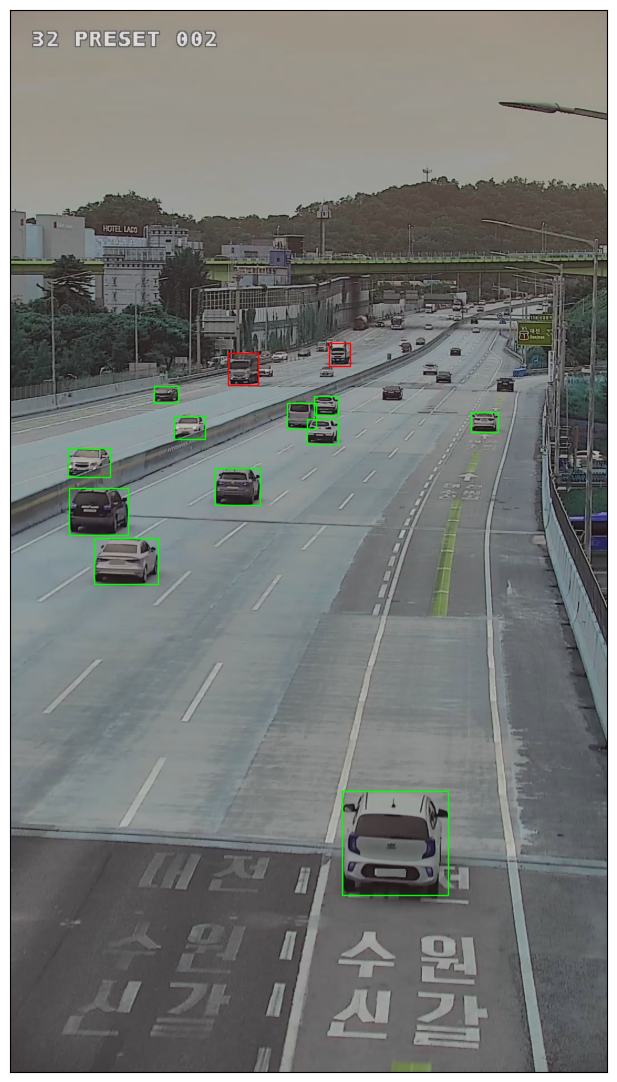

In [195]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_patch_rectangle(y, color):
  # # in yolov5
  width = int(y[2])
  height = int(y[3])
  return patches.Rectangle((int(y[0] - width/2), int(y[1] - height/2)),
                           width, height,
                           edgecolor=color, fill=False)

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def plot_image(image, boxes, axis):
  # # print(boxes.shape)
  for box in boxes:
    # print(box)
    class_id = int(box[0])
    # print(type(class_id), class_id)
    rect = create_patch_rectangle(box[1:], COLORS[class_id])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], Y[id], axis)

plot_images(np.array([X_test[-1]]), np.array([Y_test[-1]]))